In [83]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Model
import matplotlib.pyplot as plt


In [84]:
veri_yolu = 'C:/Users/ekiny/OneDrive/Masaüstü/fruit-classification/dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
)

train_generator = train_datagen.flow_from_directory(
    veri_yolu,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training', 
)

validation_generator = train_datagen.flow_from_directory(
    veri_yolu,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  
)



Found 420 images belonging to 4 classes.
Found 180 images belonging to 4 classes.


In [85]:
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
14/14 [==============================] - 31s 2s/step - loss: 0.5843 - accuracy: 0.8167 - val_loss: 0.1897 - val_accuracy: 0.9556
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.0363 - accuracy: 0.9929 - val_loss: 0.2205 - val_accuracy: 0.9222
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0999 - val_accuracy: 0.9667
Epoch 4/10
14/14 [==============================] - 20s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 0.9722
Epoch 5/10
14/14 [==============================] - 19s 1s/step - loss: 9.1187e-04 - accuracy: 1.0000 - val_loss: 0.1323 - val_accuracy: 0.9500
Epoch 6/10
14/14 [==============================] - 20s 1s/step - loss: 4.8233e-04 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 0.9444
Epoch 7/10
14/14 [==============================] - 20s 1s/step - loss: 2.1061e-04 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9556
Epoch 8/

In [86]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_width = 224 
img_height = 224  

image_path = 'C://Users/ekiny/OneDrive/Masaüstü/fruit-classification/test/1.jpg' 
img = load_img(image_path, target_size=(img_width, img_height))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)


class_names = {0: 'Elma', 1: 'Muz', 2: 'Ananas', 3: 'Çilek'} 
predicted_class_name = class_names[predicted_class[0]]
print("Tahmin Edilen Meyve:", predicted_class_name)


1/1 [==============================] - 2s 2s/step
Tahmin Edilen Meyve: Ananas


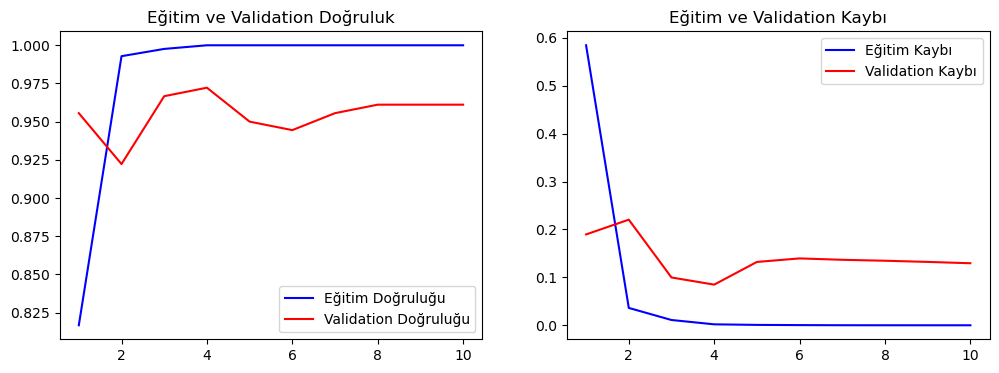

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'r', label='Validation Doğruluğu')
plt.title('Eğitim ve Validation Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'r', label='Validation Kaybı')
plt.title('Eğitim ve Validation Kaybı')
plt.legend()

plt.show()